In [97]:
import pandas as pd 
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
data = pd.read_csv('./data/draft_analysis.csv', sep = ';', index_col=False)
data.head(15)

,Customer,Year,Product,Unit,Amount,Buying_Price,Sales_Price
0,MSCH,2023.0,Socks,2-pack,1200.0,"1,23","4,00"
1,MSCH,2023.0,Socks,2-pack,2400.0,"1,24","5,00"
2,MSCH,2023.0,Socks,3-pack,1000.0,"1,20","4,50"
3,MSCH,2023.0,Trunks,1-pack,4000.0,"1,67","4,80"
4,MSCH,2023.0,T-shirt,3-pack,1200.0,"3,00","14,00"
5,MSCH,2023.0,Socks,2-pack,1200.0,"1,32","4,00"
6,MSCH,2023.0,Socks,2-pack,3000.0,"1,23","2,00"
7,MSCH,2024.0,T-shirt,1-pack,4000.0,"3,00","14,00"
8,MSCH,2024.0,Trunks,1-pack,1500.0,"1,87","8,00"
9,MSCH,2024.0,Socks,3-pack,3000.0,"1,24","4,00"


In [99]:
data['Buying_Price'] = (
    data['Buying_Price']
    .astype(str)
    .str.replace(',', '.', regex=False)
    .astype(float)
)
data['Sales_Price'] = (
    data['Sales_Price']
    .astype(str)
    .str.replace(',', '.', regex=False)
    .astype(float)
)


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Customer      14 non-null     object 
 1   Year          14 non-null     float64
 2   Product       14 non-null     object 
 3   Unit          14 non-null     object 
 4   Amount        14 non-null     float64
 5   Buying_Price  14 non-null     float64
 6   Sales_Price   14 non-null     float64
dtypes: float64(4), object(3)
memory usage: 968.0+ bytes


In [101]:
data['Year'] = data.Year.astype('Int64')
data['Amount'] = data.Amount.astype('Int64')

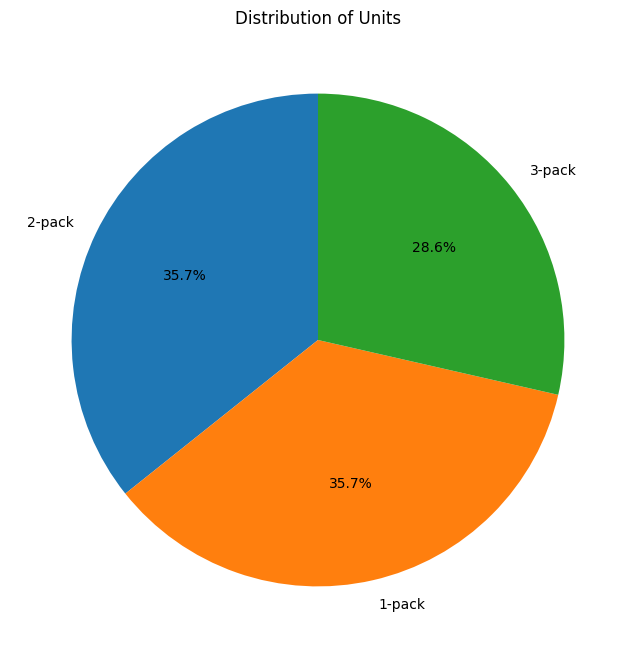

In [102]:
unit_count = data.Unit.value_counts()

plt.figure(figsize=(10,8))
plt.pie(unit_count, labels=unit_count.index,autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Units")
plt.show()

In [103]:
data_per_year = data.groupby(['Year', 'Product'], as_index=False)['Amount'].sum()
data_per_year.head(15)

,Year,Product,Amount
0,2023,Socks,8800
1,2023,T-shirt,1200
2,2023,Trunks,4000
3,2024,Socks,8900
4,2024,T-shirt,8000
5,2024,Trunks,1500
6,2025,Socks,1200


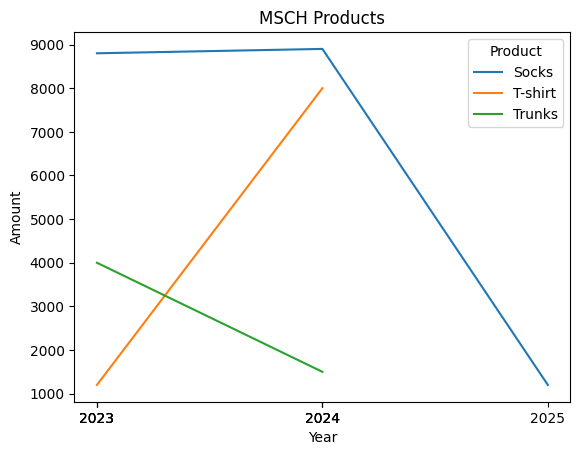

In [104]:
sns.lineplot(data_per_year, x=data_per_year.Year, y=data_per_year.Amount, hue=data_per_year.Product)
plt.xticks(data_per_year['Year'])
plt.title('MSCH Products')
plt.show()

In [105]:
data.head()

,Customer,Year,Product,Unit,Amount,Buying_Price,Sales_Price
0,MSCH,2023,Socks,2-pack,1200,1.23,4.0
1,MSCH,2023,Socks,2-pack,2400,1.24,5.0
2,MSCH,2023,Socks,3-pack,1000,1.20,4.5
3,MSCH,2023,Trunks,1-pack,4000,1.67,4.8
4,MSCH,2023,T-shirt,3-pack,1200,3.00,14.0


In [118]:
price = (
    data.groupby(['Year','Product','Unit'])
    .apply(lambda g: np.average(g['Buying_Price'], weights=g['Amount']))
    .reset_index(name='Weighted_Buying_Price')
)
price

/var/folders/bj/p18ygv1s6wbg6865d00fd5h80000gn/T/ipykernel_6407/42627049.py:3: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,Year,Product,Unit,Weighted_Buying_Price
0,2023,Socks,2-pack,1.246923
1,2023,Socks,3-pack,1.200000
2,2023,T-shirt,3-pack,3.000000
3,2023,Trunks,1-pack,1.670000
4,2024,Socks,1-pack,1.200000
5,2024,Socks,3-pack,1.240000
6,2024,T-shirt,1-pack,3.000000
7,2024,T-shirt,3-pack,3.000000
8,2024,Trunks,1-pack,1.870000
9,2025,Socks,2-pack,1.100000


([<matplotlib.axis.XTick at 0x32be5dde0>,
 [Text(2023, 0, '2023'),
  Text(2023, 0, '2023'),
  Text(2023, 0, '2023'),
  Text(2023, 0, '2023'),
  Text(2024, 0, '2024'),
  Text(2024, 0, '2024'),
  Text(2024, 0, '2024'),
  Text(2024, 0, '2024'),
  Text(2024, 0, '2024'),
  Text(2025, 0, '2025')])

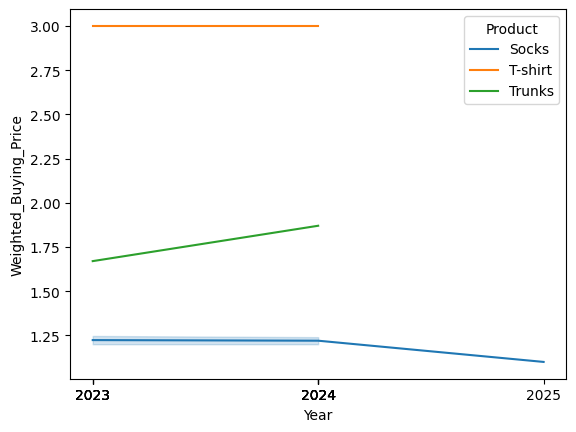

In [119]:
sns.lineplot(price, x=price.Year, y=price.Weighted_Buying_Price, hue=price.Product)
plt.xticks(price.Year)

In [110]:
sales = data.groupby(['Year', 'Product', 'Unit'], as_index=False)['Sales_Price'].mean()
sales

,Year,Product,Unit,Sales_Price
0,2023,Socks,2-pack,3.75
1,2023,Socks,3-pack,4.50
2,2023,T-shirt,3-pack,14.00
3,2023,Trunks,1-pack,4.80
4,2024,Socks,1-pack,6.50
5,2024,Socks,3-pack,4.00
6,2024,T-shirt,1-pack,14.00
7,2024,T-shirt,3-pack,13.00
8,2024,Trunks,1-pack,8.00
9,2025,Socks,2-pack,8.00


([<matplotlib.axis.XTick at 0x32bc0d720>,
 [Text(2023, 0, '2023'),
  Text(2023, 0, '2023'),
  Text(2023, 0, '2023'),
  Text(2023, 0, '2023'),
  Text(2024, 0, '2024'),
  Text(2024, 0, '2024'),
  Text(2024, 0, '2024'),
  Text(2024, 0, '2024'),
  Text(2024, 0, '2024'),
  Text(2025, 0, '2025')])

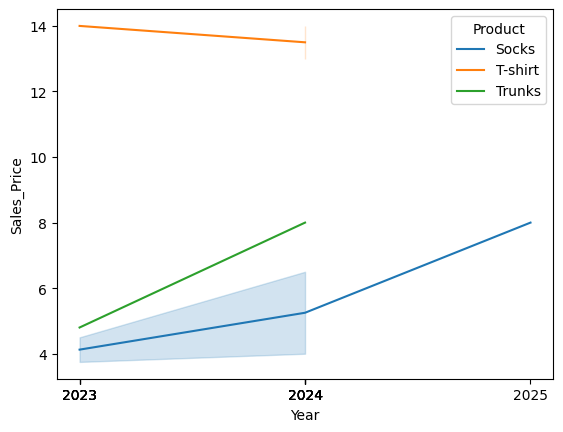

In [109]:
sns.lineplot(sales, x=sales.Year, y=sales.Sales_Price, hue=sales.Product)
plt.xticks(sales.Year)